#Generate User Ratings

Import libraries

In [95]:
import numpy as np
import pandas as pd

Parameters for synthetic data generation

## Generate natural user ratings based on crafted user preference

In [96]:
num_users = 100000  # Number of users
num_categories = 8  # Number of categories
min_ratings = 8  # Minimum number of ratings per user
max_ratings = 100  # Maximum number of ratings per user

Crafted list of category pairs with positive correlations.
This 2D matrix defines a made up arbitrary positive correlations between categories to create patterns within the data.

In [97]:
correlation_pairs = [
    ["cat_1", "cat_8"], ["cat_1", "cat_3"],
    ["cat_1", "cat_5"], ["cat_2", "cat_6"],
    ["cat_2", "cat_3"], ["cat_2", "cat_4"],
    ["cat_2", "cat_8"], ["cat_3", "cat_5"],
    ["cat_3", "cat_7"], ["cat_3", "cat_8"],
    ["cat_4", "cat_5"], ["cat_4", "cat_8"],
    ["cat_5", "cat_8"], ["cat_5", "cat_6"],
    ["cat_7", "cat_8"]
]

Initialize the dataframe for user ratings with initial random ratings

In [98]:
user_ratings_csv = pd.DataFrame({
    'id_user': np.arange(1, num_users + 1),
    'num_ratings': np.random.randint(min_ratings, max_ratings + 1, num_users),
    'avg_rating': np.zeros(num_users)  # Placeholder for average rating
})

Generate skewed ratings with spikes at whole numbers

In [99]:
def generate_ratings(num_users):
    ratings = []
    for _ in range(num_users):
        if np.random.rand() < 0.20:
            # Directly append 0 with a 20% chance
            ratings.append(0)
        else:
            # Generate ratings from 1 to 5 with the specified distribution
            rating = np.random.choice([1, 2, 3, 4, 5], p=[0.05, 0.10, 0.20, 0.40, 0.25])
            # Add random float variation and then round
            rating = np.clip(rating + np.random.normal(0, 0.2), 1, 5).round(3)
            ratings.append(rating)
    return ratings

Adding columns for each category with ratings

In [100]:
for i in range(1, num_categories + 1):
    user_ratings_csv[f'cat_{i}'] = generate_ratings(num_users)

Introduce correlations based on the crafted correlation matrix

In [101]:
for cat1, cat2 in correlation_pairs:
    # Adjust ratings to be positively correlated
    # Identify indices where neither rating is 0
    non_zero_indices = (user_ratings_csv[cat1] != 0) & (user_ratings_csv[cat2] != 0)

    # Calculate the average rating for non-zero pairs
    avg_rating = (user_ratings_csv.loc[non_zero_indices, cat1] + user_ratings_csv.loc[non_zero_indices, cat2]) / 2

    # Adjust ratings to be positively correlated for non-zero pairs
    user_ratings_csv.loc[non_zero_indices, cat1] = np.random.normal(avg_rating, 0.2).clip(1, 5).round(3)
    user_ratings_csv.loc[non_zero_indices, cat2] = np.random.normal(avg_rating, 0.2).clip(1, 5).round(3)


Calculate average ratings for each user and round to 3 decimal places

In [102]:
user_ratings_csv['avg_rating'] = user_ratings_csv[[f'cat_{i}' for i in range(1, num_categories + 1)]].mean(axis=1).round(3)

Save the DataFrame to a CSV file

In [103]:
csv_file_path = 'synthetic_user_ratings_correlation.csv'

user_ratings_csv.to_csv(csv_file_path, index=False)

In [104]:
# Return the path to the CSV file for download
csv_file_path

'synthetic_user_ratings_correlation.csv'

## Display data

Load the saved file

In [105]:
file_path = csv_file_path
data = pd.read_csv(file_path)

Shuffle the data to see unique values

In [106]:
shuffled_data = data.sample(n=100, random_state=42)

Display 100 values in the table

In [107]:
print(shuffled_data)

       id_user  num_ratings  avg_rating  cat_1  cat_2  cat_3  cat_4  cat_5  \
75721    75722           18       3.275  0.000  4.210  4.831  4.337  4.033   
80184    80185           46       2.911  3.825  3.624  0.000  0.000  4.292   
19864    19865           66       2.030  0.000  3.566  4.270  3.881  0.000   
76699    76700           29       3.317  4.723  3.578  3.766  3.720  0.000   
92991    92992           23       2.711  0.000  0.000  4.165  4.561  0.000   
...        ...          ...         ...    ...    ...    ...    ...    ...   
91957    91958           64       3.664  4.246  3.384  3.508  3.509  3.665   
81346    81347           36       2.855  1.712  2.999  2.961  3.504  3.864   
55325    55326           31       1.493  1.305  0.000  1.506  5.000  0.000   
29857    29858           98       3.071  4.006  3.266  2.629  3.163  2.773   
71222    71223           90       2.667  3.710  4.356  3.442  3.323  3.411   

       cat_6  cat_7  cat_8  
75721  0.000  4.217  4.570  
80184

### Visualize Correlations

Include libraries

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

Load the generated dataset and premade categories

In [109]:
file_path_ratings = csv_file_path
file_path_categories = 'jasa_categories_enumerations.csv'

List of category pairs for correlation analysis

In [110]:
correlation_pairs = [
    ["cat_1", "cat_8"], ["cat_1", "cat_3"],
    ["cat_1", "cat_5"], ["cat_2", "cat_6"],
    ["cat_2", "cat_3"], ["cat_2", "cat_4"],
    ["cat_2", "cat_8"], ["cat_3", "cat_5"],
    ["cat_3", "cat_7"], ["cat_3", "cat_8"],
    ["cat_4", "cat_5"], ["cat_4", "cat_8"],
    ["cat_5", "cat_8"], ["cat_5", "cat_6"],
    ["cat_7", "cat_8"]
]

Reading the files

In [111]:
ratings_data = pd.read_csv(file_path_ratings)
categories_data = pd.read_csv(file_path_categories)

Calculate correlations for the specified pairs

In [115]:
correlation_results = {}
for pair in correlation_pairs:
    filtered_data = ratings_data[(ratings_data[pair[0]] != 0) & (ratings_data[pair[1]] != 0)]
    correlation_results[f"{pair[0]} & {pair[1]}"] = filtered_data[pair].corr().iloc[0, 1]


Display the correlation values

In [116]:
print(correlation_results)

{'cat_1 & cat_8': 0.3949222560126843, 'cat_1 & cat_3': 0.4124744427443944, 'cat_1 & cat_5': 0.2829288043546738, 'cat_2 & cat_6': 0.4010067780703193, 'cat_2 & cat_3': 0.5340256536885727, 'cat_2 & cat_4': 0.6608163333597045, 'cat_2 & cat_8': 0.4118950079849917, 'cat_3 & cat_5': 0.39234963944450435, 'cat_3 & cat_7': 0.7463102831191614, 'cat_3 & cat_8': 0.6881081290895223, 'cat_4 & cat_5': 0.583104994644563, 'cat_4 & cat_8': 0.6509167170337579, 'cat_5 & cat_8': 0.4717155128779561, 'cat_5 & cat_6': 0.8863789010315247, 'cat_7 & cat_8': 0.8739661542151187}


Plotting the correlations for a visual representation and Extracting categories for heatmap

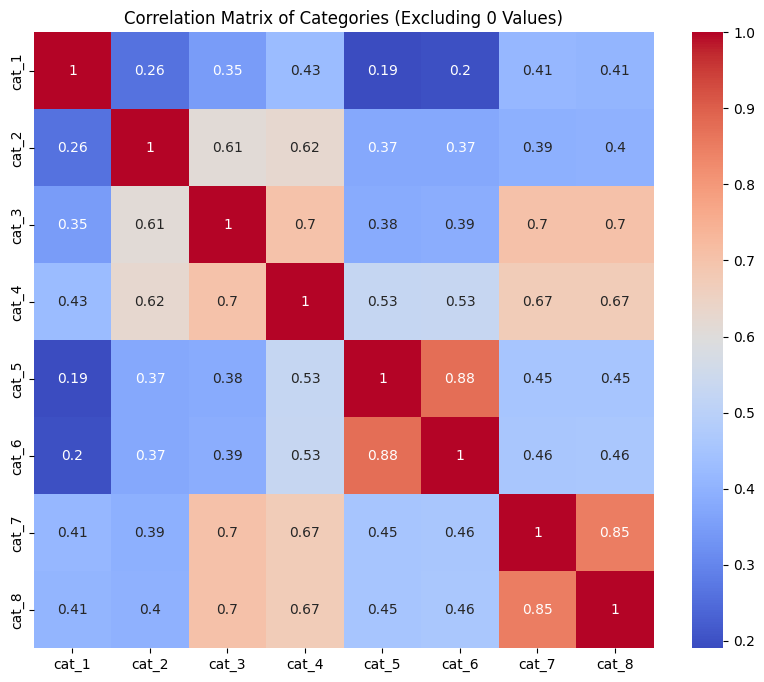

In [117]:
filtered_ratings_data = ratings_data[(ratings_data[categories] != 0).all(axis=1)]
correlation_matrix = filtered_ratings_data[categories].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Categories (Excluding 0 Values)")
plt.show()